# Chapter 6. 일반선형모델

## 6.2 일반선형모델의 기본

* **(배경)** 있다, 없다 또는 1, 2, 3 등 0 이상의 정수만을 취하는 데이터가 있다면 모집단 분포가 정규분포라고 가정하기에는 무리가 있음

* 여기서 등장하는 것이 일반화선형모델(Generalized Linear Models, GLM)

* 일반선형모델을 이용하면 분류 문제와 회귀 문제를 통일성 있게 취급할 수 있음 

    - 고전적 통계 처리에 비하면 커다란 진보

### 6.2.1 일반화선형모델의 구성요소

* 일반화 선형모델은 아래 세 가지를 구성요소로 가짐

    - 1. 모집단이 따르는 확률분포
    
    - 2. 선형예측자
    
    - 3. 링크함수
  

### 6.2.2 확률분포

* 일반화선형모델은 정규분포나 이항분포, 포아송 분포 등에 적용할 수 있음

### 6.2.3 선형예측자

* **선형예측자** 란 독립변수를 선형의 관계식으로 표현한 것

* 예) $\beta_0 + \beta_1 \times 기온(^{\circ}C)$ , $\beta_0 + \beta_1 \times 공부시간$  등

### 6.2.4 링크함수

* **링크함수**는 종속변수와 선형예측자를 서로 대응시키기 위해 사용함

* 예) $log\left[ 맥주 판매 개수 \right] = \beta_0 + \beta_1 \times 기온(^{\circ}C)$, 링크함수로 로그함수가 자주 사용됨(종속변수가 - 값이 나오지 않도록 하기 위해서)

* 종속변수에 링크함수를 적용함으로써 0 이상의 카운트 데이터나 [0, 1] 범위를 취하는 성공확률 등을 대상으로 예측할 수 있음

### 6.2.5 링크함수와 확률분포의 대응

* 확률분포와 링크함수는 아래와 같이 한 벌로 사용되는 경우가 많음

|확률분포   |링크함수 |모델명 
|:----------|:--------|:------
|정규분포   |항등함수 |정규선형모델
|이항분포   |로짓함수 |로지스틱회귀
|포아송분포 |로그함수 |포아송회귀

* 정규분포에서 링크함수를 로그하수로 하여 종속변수가 마이너스 값이 되지 않게 한 모델도 있으며,

* 음이항분포에서도 링크함수로 로그함수가 자주 사용됨

* 감마분포에 대해서는 링크함수로 로그함수를 사용하기도 하고 역수(1/x)를 사용하기도 함

### 6.2.6 일반화선형모델의 파라미터 추정

* 일반화 선형모델에서는 정규분포 이외의 확률분포가 사용되는 경우도 있기 때문에 최대우도법에 의한 파라미터 추정을 실시함

* 파라미터 추정을 위한 알고리즘으로 반복적인 최소제곱법이 이용되는 경우도 많음

### 6.2.7 일반화선형모델을 이용한 검정 방법

* 보통 세 가지 검정 방법이 제안됨

    - 1. 일반화선형모델에서는 회귀계수의 t 검정을 실시할 수 없음 -> wald 검정
    
        + Wald 검정은 샘플사이즈가 클 때 추정값이 정규분포를 따르는 것을 이용한 검정 방법으로 Wald 검정의 결과값은 statsmodels의 출력에서도 볼 수 있음
        
    - 2. 우도비 검정(likelihood ratio test)
    
    - 3. 스코어 검정(score test)

## 6.3 로지스틱 회귀

* **로지스틱 회귀** 는 확률분포에 이항분포를 사용하고, 링크함수에 로짓함수를 사용한 일반선형모델임

### 6.3.1 이 절의 예제

* 시험에 합격, 불합격하는 것을 예측한다고 했을 때 공부시간에 따라 시험 합불 여부가 달라진다는 구조를 수리모델로 만들면 선형예측자는 아래와 같음

 $$\beta_0 + \beta_1 \times 공부시간$$

### 6.3.2 두 값 판별 문제

* 종속변수를 합격:1 , 불합격:0 을 취하는 이항확률변수라고 가정

* 공부시간은 연속형 변수이므로 선형예측자를 그대로 시험 합불과 연결할 수 없음

* 이 문제는 링크함수로 로짓함수를 적용함으로써 해결 가능

### 6.3.4 역함수

* 어떤 함수 $f(a) = b$가 있다고 할 때,  $g(b) = a$가 되는 함수$g(x)$를 $f(x)$의 **역함수** 라고 함(지수함수의 역함수는 로그함수)

### 6.3.5 로지스틱 함수

* **로지스틱 함수** 는 로짓함수의 역함수

* 로지스틱함수 정의 $$g(y) = \frac{1}{1+exp(-y)}$$

### 6.3.6 로지스틱 함수의 특징

* 지수함수인 $exp(-y)$는 음수가 될 수 없음

    - 때문에 로지스틱함수의 분모는 1이하로 내려가지 않음
    
* 분모가 큰 값이 되면 로지스틱 함수의 출력은 점점 0이 됨

    - $ y \to \infty$ 일 때 $g(y)  \to 1$
    
    - $ y \to -\infty$ 일 때 $g(y) \to 0$

### 6.3.7 로지스틱 회귀의 구조

* 로지스틱 회귀는 확률분포에 이항분포를 사용하고 링크함수에 로짓함수를 사용한 일반화 선형 모델

$$ log \left ( \frac{P}{1-P} \right) = \beta_0 + \beta_1 \times 공부시간 $$

$$ P = \frac{1}{1+exp \left[ - \left ( \beta_0 + \beta_1 \times 공부시간 \right ) \right]}$$

* 공부시간이 5시간이던 학생이 10명이 있다고 할 때, 합격자수 M은 성공확률이 시행횟수가 10인 이항분포를 따른다고 상정할 때 아래와 같은 식이 성립함

* 합격자수: $M \sim Bin \left( m|10,  \frac{1}{1+exp \left[ - \left ( \beta_0 + \beta_1 \times 5 \right ) \right]} \right)$

### 6.3.8 로지스틱 회귀의 우도함수

* 계수 $\beta_0$ , $\beta_1$의 추정 : 일반화선형모델에서는 최대우도법으로 파라미터를 추정함

* 아래와 같은 데이터를 얻었다고 가정할 때 

    - 공부시간이 3시간인 학생 9명 중 4명이 합격함
    - 공부시간이 5시간인 학생 8명 중 6명이 합격함
    - 공부시간이 8시간인 학생 1명 중 1명이 합격함


* 이때 우도함수를 $L \left( \beta_0, \beta_1 ; N, m \right)$ 로 놓을 수 있음

     - 시행횟수 N가 합격자수 m이 데이터로 주어졌으므로 우도함수는 아래와 같이 기술할 수 있다.
     
     - $$L \left( \beta_0, \beta_1 ; N, m \right) = Bin \left( 4|9,  \frac{1}{1+exp \left[ - \left ( \beta_0 + \beta_1 \times 3 \right ) \right]} \right) \times 
     Bin \left( 6|8,  \frac{1}{1+exp \left[ - \left ( \beta_0 + \beta_1 \times 5 \right ) \right]} \right) \times
     Bin \left( 1|1,  \frac{1}{1+exp \left[ - \left ( \beta_0 + \beta_1 \times 8 \right ) \right]} \right)$$

* 시험자수가 늘어나면 수식이 복잡해지긴 하지만 구조는 변하지 않음

### 6.3.9 분석준비

In [1]:
# 이항분포를 다루기 위해 필요한 라이브러리 임포트

# 수치계산에 사용되는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계모델을 추정하는데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 6.3.10 데이터 읽어 들이기와 그래프 표시

* 가상의 시험 합격 여부 데이터(hours가 공부시간, result가 시험의 합격여부)

In [2]:
test_result = pd.read_csv("py_source/6-3-1-logistic-regression.csv")
print(test_result.head(3))

   hours  result
0      0       0
1      0       0
2      0       0


<AxesSubplot:xlabel='hours', ylabel='result'>

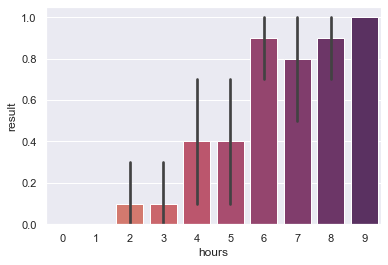

In [3]:
# 공부시간별 시험 합격률 막대그래프

sns.barplot(x = "hours", y = "result", data = test_result, palette = "flare")

In [4]:
# 공부시간 마다의 합격률 계산

print(test_result.groupby("hours").mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


### 6.3.11 로지스틱 회귀(실습)

In [5]:
# 로지스틱 회귀모델 추정

mod_glm = smf.glm(formula = "result ~ hours", data = test_result, family = sm.families.Binomial()).fit()

* 일반화 선형모델을 추정하는 경우에는 smf.glm 함수를 사용함

    * 첫번째 파라미터 "result ~ hours"는 formula
    
    * 두번째 파라미터 : 데이터
    
    * 세번째 파라미터 : 확률분포 지정
        
        + 이항분포로 지정할 경우 ```sm.families.Binomial()``` (링크함수는 로짓함수)
        
        + 포아송 분포로 지정할 경우 ```sm.families.Poisson()``` (링크함수는 로그함수)
        
    * 이항분포로 지정할 경우 링크함수는 디폴트로 로짓함수가 지정되나, ```sm.families.Binomial(link = sm.families.links.logit)``` 이라고 명시적으로 로짓함수를 지정할 수 있음

### 6.3.12 로지스틱 회귀 결과의 출력

In [6]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 18 Sep 2022   Deviance:                       68.028
Time:                        19:14:17   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

* **Method** : IRLS(Iterative Reweighted Least Squares(최소제곱법))

* **Deviance(이탈도)** 와 **Pearson chi2** 은 모델의 적합도를 나타내는 지표

* 계수에 대해서는 t검정 대신 **wald 검정 결과**가 출력되고 있음

### 6.3.13 모델 선택

* AIC를 사용하여 Null 모델과 독립변수가 있는 모델 중 어느 쪽이 좋은 모델인지 비교

In [7]:
mod_glm_null = smf.glm("result ~ 1" , data = test_result, family = sm.families.Binomial()).fit()

* AIC 비교

In [8]:
print("Null 모델    : ", mod_glm_null.aic.round(3))
print("독립변수 모델: ", mod_glm.aic.round(3))

Null 모델    :  139.989
독립변수 모델:  72.028


* 공부시간을 독립변수로 이용한 모델의 AIC가 더 작음

    - 공부시간이라는 변수는 합격률을 예측하는데 도움이 됨 


* 공부시간의 계수가 양수였던 점도 감안하면 공부시간을 늘리면 합격률도 오른다고 판단해도 괜찮을 것임

### 6.3.14 로지스틱 회귀곡선 그래프

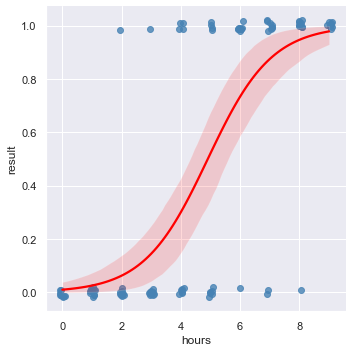

In [9]:
sns.lmplot(x = "hours", y = "result", data = test_result, logistic = True, scatter_kws = {"color" : "steelblue"}, line_kws = {"color" : "red"}, x_jitter= 0.1, y_jitter = 0.02)

* logistic = True 파라미터 입력

* x_jitter와 y_jitter는 산포도가 그리는 데이터의 점을 조금 위아래로 흩어지게 하는 설정(합격여부에는 0과 1만 있어서 데이터가 겹치므로 이러한 설정을 함)

### 6.3.15 성공확률 예측

* 합격률을 수치로 얻을 수도 있음

In [10]:
# 0~9까지 1씩 증가시키는 등차수열
exp_val = pd.DataFrame({"hours" : np.arange(0, 10, 1)})

# 성공확률의 예측치
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

* 성공확률의 컷오프(cut-off) 값을 지정하여 합격/불합격 이산적으로 구분 가능

### 6.3.16 용어 설명

* **오즈(odds)** : 실패하는 것보다 성공하는 것이 몇 배 더 쉬운가를 나타내는 것으로 다음과 같이 계산할 수 있음

$$odds = \frac{p}{1-p}$$

* p = 0.5 일 때 오즈는 1이 되어 성공과 실패의 쉬움이 변하지 않음

* p = 0.75 일 때 오즈는 3이 되어 성공이 실패보다 3배 쉬워짐

* **로그오즈** : 오즈에 로그를 취한 것. 로짓함수는 성공확률을 로그오즈로 변환하는 함수로도 볼 수 있음

* **오즈비(odd ratio)** : 오즈 간에 비율을 취한 것

* **로그오즈비** : 오즈비에 로그를 취한 것

### 6.3.17 로지스틱 회귀계수와 오즈비의 관계

* 회귀계수는 독립변수를 1단위 변화시켰을 때의 **로그오즈비** 라고 해석

* 예) 공부시간이 1시간일 때의 합격률과 2시간일 때의 합격률을 각각 구하여 로그오즈비를 계산함

In [11]:
# 공부시간이 1시간일 때의 합격률
exp_val_1 = pd.DataFrame({"hours" : [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 공부시간이 2시간일 때의 합격률
exp_val_2 = pd.DataFrame({"hours" : [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [12]:
# 오즈
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

In [13]:
# 로그오즈비
np.log(odds_2 / odds_1)

0    0.92889
dtype: float64

In [14]:
# 로그오즈비 = 공부시간의 계수
mod_glm.params["hours"]

0.929

In [15]:
# 계수에 exp를 취한 것이 오즈비 
np.exp(mod_glm.params["hours"])

2.532

* 독립변수가 1단위 늘어나면 오즈가 몇 배가 되느냐는 계수를 보는 것으로 판단 가능